This notebook runs briefly through a solution to the exercise at the end of Worksheet 3 of the _Introduction to Python Programming_ course workbook.

Start by importing the additional functionality that you need, to print the data structure and draw the plots.

In [2]:
import pprint
import matplotlib.pyplot as plt

# the next line is for plotting in the IPython notebook only
%matplotlib inline

Now define the function that will draw each barchart of observations. (This function definition contains a list of colors for the bars, as tuples of RGB values, that will plot each species in a different color.)

In [3]:
def doBarChart(heights, labels, title, rows, columns, subplot):
    plt.subplot(rows, columns, subplot)
    plt.bar(range(len(labels)), heights, color=[(0.9,0.05,0.05),(0.35,1.0,0.35),(0.05,0.05,0.9),(0.9,1.0,0.0),(0.7,0.1,0.7),(0.05,0.9,0.05),(1.0,0.5,0.5),(0.0,0.0,0.5),(0.75,0.75,0.0),(0.0,0.3,0.3),(0.0,0.5,0.0),(0.2,0.8,0.8),(0.6,0.05,0.25)])
    plt.title(title)
    plt.xlabel('Taxon')
    plt.ylabel('Abundance')
    plt.axis([0, len(labels), 0, 25000])
    tickPos = []
    for pos in range(len(labels)):
        tickPos.append(pos+0.4)
    plt.xticks(tickPos,labels)

Initialise an empty dictionary, to store the data for each site, and an empty list, to store the species names as you find them. Then, open a file object and read the data line-by-line, populating the data structures as you go.

In [6]:
sites = {}
taxa = []
# make sure that you change the file path below to specify the location of the data file on your system
datafile = open('/Users/hodges/Documents/Courses/IntroductionToPython/speciesDistribution.txt', 'r')

for line in datafile:
    line = line.strip()
    if line.startswith('Site:'):
        tag, siteName = line.split(" ", 1)
        sites[siteName] = {}
    else:
        taxonID, count = line.split()
        count = int(count)
        sites[siteName][taxonID] = count
        if taxonID not in taxa:
            taxa.append(taxonID)

Now that you have read all of the data from the file, you need to loop over each site again, to add zero values for each species not observed. (Exercise 3.4)

In [33]:
for site in sites:
    for taxon in taxa:
        if taxon not in sites[site]:
            sites[site][taxon] = 0

Now, you should have a dictionary, `sites`, keyed by site names, with values that are themselves dictionaries keyed by species ID. Each of these dictionaries within `sites` should have the same number of entries because you added the zero counts. To check out the overall data structure, you can use `pprint.PrettyPrinter`. (Exercise 3.5)

this is a note.

In [34]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(sites)

{   'Grimston Wood': {   'A': 123,
                         'B': 1340,
                         'C': 11984,
                         'D': 0,
                         'E': 9389,
                         'F': 4320,
                         'G': 1283,
                         'H': 0,
                         'I': 0,
                         'J': 8193,
                         'K': 193,
                         'L': 0,
                         'M': 0},
    'Hagg Wood': {   'A': 2039,
                     'B': 9394,
                     'C': 19380,
                     'D': 9102,
                     'E': 932,
                     'F': 0,
                     'G': 893,
                     'H': 5839,
                     'I': 0,
                     'J': 9302,
                     'K': 0,
                     'L': 984,
                     'M': 0},
    'Hetchell Wood N': {   'A': 12983,
                           'B': 8493,
                           'C': 948,
                           'D'

Looks good to me! Now, you want to be able to control the order in which the species and counts are extracted from this dictionary for plotting. To do this, you use the dictionary keys and the list of species names that were compiled when the data was read from the file. To make the plot more intuitive, you can make sure that both of these are sorted alphabetically.

In [35]:
speciesNames.sort()
siteNames = sites.keys()
siteNames.sort()

Now, you are ready to plot the data using the function defined above. (Exercise 3.6)

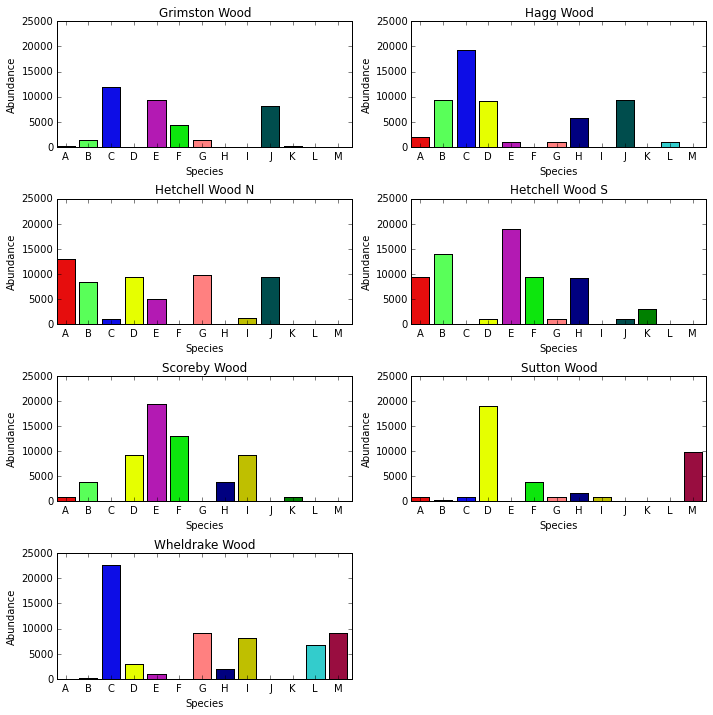

In [27]:
plt.figure(1, figsize=(10,10)) # you can choose your own figure size or leave
                               # this argument out to use the default setting.

subnumber = 0

for site in siteNames:
    subnumber += 1
    barValues = []
    for species in speciesNames:
        barValues.append(sites[site][species])
    doBarChart(barValues, speciesNames, site, 4, 2, subnumber)

plt.tight_layout()
plt.show()